## Boosting Techniques

```
1. What is Boosting in Machine Learning? Explain how it improves weak learners.

->

Boosting is an ensemble learning technique in machine learning that combines the predictions of multiple weak learners (typically simple models like decision trees with limited depth) to create a strong learner.

How it improves weak learners:


i) Sequential Learning:

Unlike bagging (like Random Forests) where models are trained independently, boosting trains models sequentially. Each new model is built to correct the errors made by the previous ones.


ii) Focus on Difficult Examples:

In each iteration, boosting gives more weight to the instances that were misclassified by the previous models. This forces the new models to focus on the "hard-to-learn" examples.


iii) Weighted Voting (or Combination):

The final prediction is a weighted combination of the predictions from all the weak learners. Models that perform better on the training data are often given more weight.


2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

->

The main difference lies in how they weigh the instances and the type of errors they try to correct.

AdaBoost focuses on misclassified instances by adjusting their weights, while Gradient Boosting focuses on the residuals (the errors) from the previous model by fitting the next model to these residuals.


3. How does regularization help in XGBoost?

->

Regularization in XGBoost helps to prevent overfitting. It adds penalty terms to the objective function that the model tries to minimize.

These penalties discourage complex models and help the model generalize better to unseen data. XGBoost supports L1 (Lasso) and L2 (Ridge) regularization.


4. Why is CatBoost considered efficient for handling categorical data?

->

CatBoost is considered efficient for handling categorical data primarily due to its innovative approach called "Ordered Boosting" and its native handling of categorical features.

It uses a permutation-driven approach to calculate gradients, which helps prevent overfitting and bias when dealing with categorical features.

Additionally, it employs a special method for encoding categorical features on the fly during training, avoiding the need for extensive preprocessing like one-hot encoding, which can be computationally expensive and lead to high-dimensional sparse data.


5. What are some real-world applications where boosting techniques are preferred over bagging methods?

->

Boosting techniques are often preferred over bagging methods in real-world applications where high accuracy and the ability to handle complex relationships are crucial. Some examples include:

i) Fraud Detection:

Boosting models can effectively identify complex patterns in transaction data to detect fraudulent activities.

ii) Customer Churn Prediction:

Boosting can be used to predict which customers are likely to leave, allowing companies to intervene and retain them.

iii) Medical Diagnosis:

Boosting can help in building accurate diagnostic models by combining the insights from various medical features.

iv) Search Ranking:

Boosting algorithms like Gradient Boosted Decision Trees (often used in libraries like XGBoost, LightGBM, and CatBoost) are widely used in search engines to rank results based on relevance.

v) Image and Speech Recognition:

While deep learning is dominant in these areas, boosting can still be used in certain scenarios or as part of a larger ensemble.

Datasets:

● Use sklearn.datasets.load_breast_cancer() for classification tasks.

● Use sklearn.datasets.fetch_california_housing() for regression tasks.

In [1]:
'''
6. Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

->
'''

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost Classifier
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = adaboost.predict(X_test)
accuracy = round((accuracy_score(y_test, y_pred)) * 100, 2)

# Print the accuracy
print(f"AdaBoost Classifier Accuracy: {accuracy}")

AdaBoost Classifier Accuracy: 96.49


In [2]:
'''
7. Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

->
'''

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"Gradient Boosting Regressor R-squared: {r2}")

Gradient Boosting Regressor R-squared: 0.7756446042829697


In [3]:
'''
8. Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

->
'''

import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print(f"Best parameters: {grid_search.best_params_}")
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best XGBoost Classifier Accuracy: {accuracy}")

Best parameters: {'learning_rate': 0.2}
Best XGBoost Classifier Accuracy: 0.956140350877193


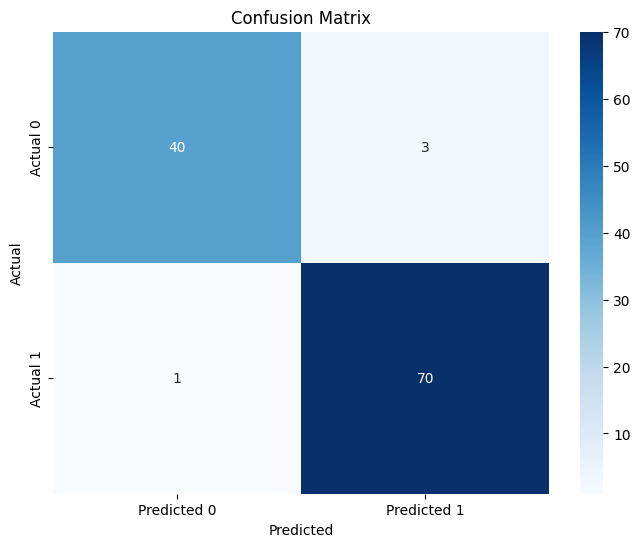

Confusion Matrix:
[[40  3]
 [ 1 70]]


In [4]:
'''
9. Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

->
'''

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost Classifier
# CatBoost handles categorical features automatically if specified,
# but for the Breast Cancer dataset, all features are numerical.
# We can still use CatBoost as a general classifier.
catboost = CatBoostClassifier(iterations=100, # Number of boosting iterations
                              learning_rate=0.1,
                              depth=6,
                              loss_function='Logloss',
                              eval_metric='Accuracy',
                              random_state=42,
                              verbose=0) # Set verbose to 0 to reduce output during training

catboost.fit(X_train, y_train)

# Predict on the test data
y_pred = catboost.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# You can also print the confusion matrix
print("Confusion Matrix:")
print(cm)

10. You're working for ographics and transaction behavior.

The dataset using customer demissing values, and has both numeric and categorical feat is imbalanced, contains ma FinTech company trying to predict loan defaultures.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model  

->

i) Data Preprocessing & Handling Missing/Categorical Values:

  Address missing values using imputation or removal. Handle categorical features with one-hot encoding, target encoding, or CatBoost's native methods. Consider feature scaling and techniques like oversampling/undersampling for class imbalance.


ii) Choice between AdaBoost, XGBoost, or CatBoost:

  CatBoost is a strong candidate due to its native handling of categorical features and missing values, which aligns well with the dataset description. XGBoost is also viable with proper preprocessing. AdaBoost might be less effective on complex, imbalanced data. The final choice might involve experimentation.


iii) Hyperparameter Tuning Strategy:
  Use techniques like GridSearchCV, RandomizedSearchCV, or Bayesian Optimization with cross-validation to find optimal hyperparameters (e.g., learning rate, number of estimators, tree depth, regularization).


iv) Evaluation Metrics you'd choose and why:

For imbalanced data, use metrics beyond accuracy, such as Precision, Recall, F1-score, ROC AUC, and PR AUC. These metrics provide a more comprehensive view of the model's performance, especially on the minority class (defaults). The specific choice depends on the business's tolerance for false positives vs. false negatives.


v) How the business would benefit from your model:

Benefits include reduced financial losses from defaults, improved risk assessment for better lending decisions, optimized resource allocation for collections, enhanced customer segmentation, and a competitive advantage through better risk management.